In [1]:
from utils.analysis.tools import simDir
from pathlib import Path
import numpy as np
from utils import plot
from utils.plot import _CM, _FIGURE_DIR
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
path = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/20240820_StationaryLocusWithSensitivityLinear17.5")

In [4]:
lst = []
for folder in path.glob("M1*"):
    sim = simDir(folder)
    sim.run()
    sim.rna()
    wc = sim.params["well_center"]
    lst.append([sim.rna_amount[-1],wc[0]])

In [5]:
arr = np.array(lst)
arr = arr[arr[:, 1].argsort()]

In [6]:
arr_sub = np.vstack([arr[:16,:],arr[20:,:]])
arr_inset = arr[15:21,:]

Text(0, 0.5, 'RNA amount (2D)')

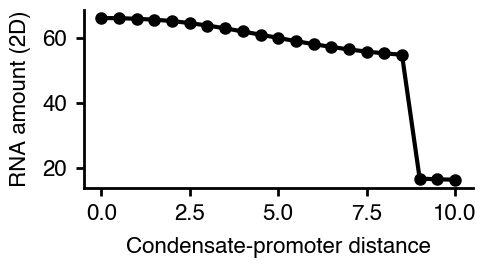

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5*1.5*_CM/2,8.5*1.5*_CM*0.23)
ax.plot(arr[:,1],arr[:,0],color="black",marker=".",markersize=7)
ax.set_xlabel("Condensate-promoter distance")
ax.set_ylabel("RNA amount (2D)")

In [8]:
df = pd.DataFrame(arr,columns=["RNA", "Distance"])

In [9]:
df_sub = df.query("(Distance < 7.6 or Distance > 7.9) and not Distance in [2.5,5.0,7.5,8.0,10.0]")
df_highlight = df.query("(Distance < 7.6 or Distance > 7.9) and Distance in [2.5,5.0,7.5,8.0,10.0]")

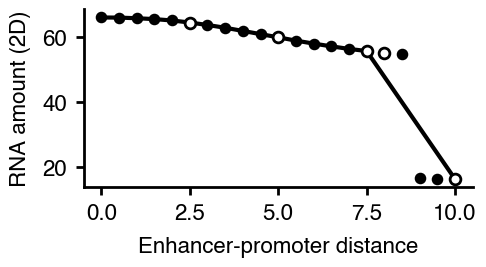

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5*1.5*_CM/2,8.5*1.5*_CM*0.23)
ax.plot(arr_sub[:,1],arr_sub[:,0],color="black")
ax.scatter(df_sub["Distance"],df_sub["RNA"],color="black",edgecolors=None,s=10)
ax.scatter(df_highlight["Distance"],df_highlight["RNA"],color="white",edgecolors="black",zorder=10,
           s=15)
ax.set_xlabel("Enhancer-promoter distance")
ax.set_ylabel("RNA amount (2D)")
# ax.set_ylim(1,18)
fig.savefig(_FIGURE_DIR/"FixedEnhancerEnhancement")
lims = ax.get_ylim()

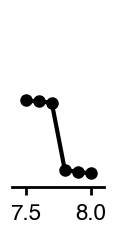

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(1.5*_CM, 8.5*1.5*_CM*0.23)
ax.plot(arr_inset[:,1],arr_inset[:,0],color="black",marker=".",markersize=7)
ax.set_ylim(lims)
ax.set_xlim([7.4,8.1])
# ax.set_xlabel("Condensate-promoter distance")
# ax.set_ylabel("RNA amount (2D)")
ax.spines[['left']].set_visible(False)
ax.get_yaxis().set_visible(False)
fig.savefig(_FIGURE_DIR/"FixedEnhancerEnhancementInset.pdf")

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5*1.5*_CM/2,8.5*1.5*_CM*0.23)
ax.plot(arr[:,1],arr[:,0],color="black",marker=".",markersize=7)
ax.set_xlabel("Condensate-promoter distance")
ax.set_ylabel("RNA amount (2D)")
fig.savefig(_FIGURE_DIR/"FixedEnhancerEnhancement")

In [11]:
def frameFigure(sim,
                   i:int,
                   t:int,
                   levels=None):
    fig,ax = plt.subplots()
    cs = ax.tricontourf(sim.geometry.mesh.x,
                        sim.geometry.mesh.y,
                        sim.concentration_profile[i][t],
                        vmin = 3.5,
                        vmax = 5,
                        cmap=sim.movie_params['color_map'][i],
                        levels=levels)
    ax.autoscale_view()
    ax.xaxis.set_tick_params(labelbottom=False, bottom=False)
    ax.yaxis.set_tick_params(labelleft=False, left=False)
    ax.set_aspect('equal', 'box')
    plt.setp(ax.spines.values(), visible=False)
    return fig,ax

- Distance dependent enhancement of transcription, from a population of cells where you condition for transcription and condensate
- What sets the length scale for the cutoff distance? The overlap of the condensate and the promoter, and some gradient-sensing distance for pinching (check the RNA concentration profile and its gradient), diffusion length scale is important, length scale of the RNA profile

2.5 + 1 + 2

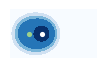

In [13]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/20240803_StationaryLocus/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_2.5_M3_0.1_kt_0.0_rl_2.5_wd_1.0_t_0.0_kd_1.0")
sim.run()
colspecs = [(i*20,(i+1)*20) for i in range(17)] 
enhancer_r = pd.read_fwf(sim.directory/"stats.txt", colspecs=colspecs)["well_center_x"].iloc[-1]
fig, ax = frameFigure(sim,i=0,t=-1,levels=3)
fig.set_size_inches(2*_CM,0.8*_CM)
ax.set_ylim(-5,5)
ax.set_xlim(left=-4,right=14)
ax.scatter(x=0, y=0, s=3, color='#9DD08A',marker=".")
ax.scatter(x=enhancer_r, y=0, s=3, color='white',marker=".")
fig.savefig(_FIGURE_DIR/"FigEP_25")

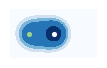

In [14]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/20240803_StationaryLocus/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_5.0_M3_0.1_kt_0.0_rl_5.0_wd_1.0_t_0.0_kd_1.0")
sim.run()
colspecs = [(i*20,(i+1)*20) for i in range(17)] 
enhancer_r = pd.read_fwf(sim.directory/"stats.txt", colspecs=colspecs)["well_center_x"].iloc[-1]
fig, ax = frameFigure(sim,i=0,t=-1,levels=3)
fig.set_size_inches(2*_CM,0.8*_CM)
ax.set_ylim(-5,5)
ax.set_xlim(left=-4,right=14)
ax.scatter(x=0, y=0, s=3, color='#9DD08A',marker=".")
ax.scatter(x=enhancer_r, y=0, s=3, color='white',marker=".")
fig.savefig(_FIGURE_DIR/"FigEP_50")

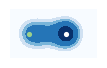

In [15]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/20240803_StationaryLocus/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_7.5_M3_0.1_kt_0.0_rl_7.5_wd_1.0_t_0.0_kd_1.0")
sim.run()
colspecs = [(i*20,(i+1)*20) for i in range(17)] 
enhancer_r = pd.read_fwf(sim.directory/"stats.txt", colspecs=colspecs)["well_center_x"].iloc[-1]
fig, ax = frameFigure(sim,i=0,t=-1,levels=3)
fig.set_size_inches(2*_CM,0.8*_CM)
ax.set_ylim(-5,5)
ax.set_xlim(left=-4,right=14)
ax.scatter(x=0, y=0, s=3, color='#9DD08A',marker=".")
ax.scatter(x=enhancer_r, y=0, s=3, color='white',marker=".")
fig.savefig(_FIGURE_DIR/"FigEP_75")

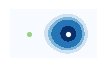

In [16]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/20240803_StationaryLocus/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_8.0_M3_0.1_kt_0.0_rl_8.0_wd_1.0_t_0.0_kd_1.0")
sim.run()
colspecs = [(i*20,(i+1)*20) for i in range(17)] 
enhancer_r = pd.read_fwf(sim.directory/"stats.txt", colspecs=colspecs)["well_center_x"].iloc[-1]
fig, ax = frameFigure(sim,i=0,t=-1,levels=3)
fig.set_size_inches(2*_CM,0.8*_CM)
ax.set_ylim(-5,5)
ax.set_xlim(left=-4,right=14)
ax.scatter(x=0, y=0, s=3, color='#9DD08A',marker=".")
ax.scatter(x=enhancer_r, y=0, s=3, color='white',marker=".")
fig.savefig(_FIGURE_DIR/"FigEP_80")

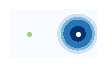

In [17]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/20240803_StationaryLocus/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10.0_M3_0.1_kt_0.0_rl_10.0_wd_1.0_t_0.0_kd_1.0")
sim.run()
colspecs = [(i*20,(i+1)*20) for i in range(17)] 
enhancer_r = pd.read_fwf(sim.directory/"stats.txt", colspecs=colspecs)["well_center_x"].iloc[-1]
fig, ax = frameFigure(sim,i=0,t=-1,levels=3)
fig.set_size_inches(2*_CM,0.8*_CM)
ax.set_ylim(-5,5)
ax.set_xlim(left=-4,right=14)
ax.scatter(x=0, y=0, s=3, color='#9DD08A',marker=".")
ax.scatter(x=enhancer_r, y=0, s=3, color='white',marker=".")
fig.savefig(_FIGURE_DIR/"FigEP_100")